In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from scipy.linalg import expm, sinm, cosm

df = pd.read_csv("ex2data1.csv")
df.columns = ["test1", "test2", "accept_reject"]
df

,test1,test2,accept_reject
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0
...,...,...,...
94,83.489163,48.380286,1
95,42.261701,87.103851,1
96,99.315009,68.775409,1
97,55.340018,64.931938,1


In [2]:
Y = df["accept_reject"]
df = df.drop(["accept_reject"], axis=1)

In [3]:
def fill_missing(df, feature, method):
    if method == "mode":
        df[feature] = df[feature].fillna(df[feature].mode()[0])
    elif method == "median":
        df[feature] = df[feature].fillna(df[feature].median())
    else:
        df[feature] = df[feature].fillna(df[feature].mean())


# this part is made to fill in na
features_missing = df.columns[df.isna().any()]
for feature in features_missing:
    fill_missing(df, feature=feature, method="median")
Y.fillna(Y.median(), inplace=True)

In [4]:
# convert dataframe to numpy
X = df.to_numpy()
y = Y.to_numpy()[:, np.newaxis]
m, n = X.shape
print(y.shape)

print(X.shape)
print(y.shape)

(99, 1)
(99, 2)
(99, 1)


In [5]:
# feature scaling
mu = X.mean(0)
sigma = X.std(0)  # standard deviation: max(x)-min(x)
xn = (X - mu) / sigma

In [6]:
# adding ones column
xn_plus_one = np.hstack((np.ones((m, 1)), xn)).transpose()

num_iters = 10000
alpha = 0.1
theta = np.zeros((n + 1, 1))

print(theta.shape)
print(xn_plus_one.shape)

(3, 1)
(3, 99)


Best theta computed from gradient descent: 
 [[1.75579328]
 [3.90246378]
 [3.70345333]] 
[0.67797907]


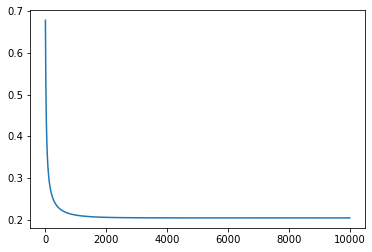

In [7]:
# j(theta)= 1/m Sum(-ylog(h(x)) - (1-y)log(1-h(x)))
def compute_cost(x, y, theta, reg_constant):
    m = len(y)  # number of training examples

    z = theta.T @ x
    sigmoid = 1 / (1 + np.exp(-z))
    J = 1 / m * (-np.log(sigmoid) @ y - np.log(1 - sigmoid) @ (1 - y))

    return J[0]


def cost_function_reg(theta, x, y, reg_constant, num_iters):
    # %COSTFUNCTIONREG Compute cost and gradient for logistic regression with regularization
    # %   J = COSTFUNCTIONREG(theta, X, y, lambda) computes the cost of using
    # %   theta as the parameter for regularized logistic regression and the
    # %   gradient of the cost w.r.t. to the parameters.

    m = len(y)  # number of training examples
    J_history = []

    # repeat until convergance
    for i in range(num_iters):
        z = theta.T @ x
        sigmoid = 1 / (1 + np.exp(-z))

        theta -= alpha / m * ((sigmoid - y.T) @ x.T).T
        # Save the cost J in every iteration
        J_history.append(compute_cost(xn_plus_one, y, theta, 0))
    return theta, J_history


theta, J_history = cost_function_reg(theta, xn_plus_one, y, 0, num_iters)
# Display gradient descent's result
print("Best theta computed from gradient descent: ")
print(f" {theta} ")
print(J_history[0])


plt.plot(J_history)
plt.show()

In [8]:
x_1 = []
x_2 = []
y_1 = []
y_2 = []

for i in range(m):
    if y[i] == 1:
        x_1.append(xn_plus_one.T[i, 1])
        y_1.append(xn_plus_one.T[i, 2])

    else:
        x_2.append(xn_plus_one.T[i, 1])
        y_2.append(xn_plus_one.T[i, 2])

[-1.85744578 -1.56789059 -0.30071501  0.6808443  -1.08696289 -0.25259733
  0.47214129  0.52806847  0.96203604  1.5571501   0.47156396  0.85134368
  0.17740711 -1.37569744 -0.62416104  0.16207486  0.10358327  0.24494002
  0.57389144  0.07365099  1.23509791 -0.80309326 -1.65304598  0.62311526
 -0.19196765  0.74111446  1.41410038 -0.21492127 -1.41488326 -0.23840128
  1.01263411 -0.72117446 -0.72443284 -1.33932249 -0.58958263 -1.66848842
 -0.09272022  0.45987878 -1.65452591  0.93441582 -0.75034814  1.48330262
  0.85455653 -0.77638236 -0.19448469  0.58504787  1.65660941 -0.20227525
  1.33341969  0.72833799  1.73476532  1.28039711 -1.63677602 -0.81602227
 -0.85246305  1.65005018 -1.73817602  0.4317308   0.30403897  0.49145292
 -1.59711824 -0.50529349 -1.86931232 -1.10857348  0.03141388 -1.32783249
 -0.87923386  0.74576932  0.04109006 -1.73059266 -0.09988885  0.33268009
 -0.28638037 -0.37057669  1.76368236 -0.97339487 -0.80708344 -0.28650167
  0.84715754  1.19537346  1.50366991  0.07090316 -0

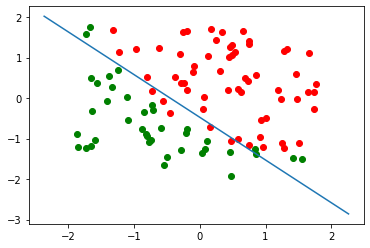

In [9]:
print(xn_plus_one.T[:, 1])
plt.scatter(x_1, y_1, color="r")
plt.scatter(x_2, y_2, color="g")
slope = lambda x: -theta[0] / theta[2] - x * theta[1] / theta[2]

min_point = min((xn_plus_one.T[:, 1])) - 0.5
max_point = max((xn_plus_one.T[:, 1])) + 0.5


points = np.array([min_point, max_point])
plt.plot(points, slope(points))